In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


Text(0.5, 0, 'Age')

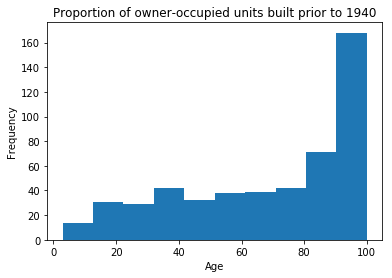

In [3]:
df['AGE'].plot.hist(title='Proportion of owner-occupied units built prior to 1940')
plt.xlabel(str('Age'))

Text(0.5, 0, 'Tax')

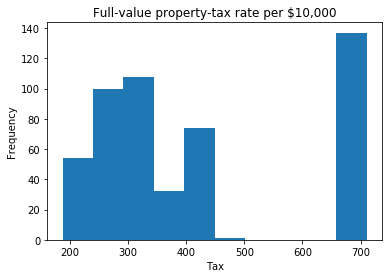

In [4]:
df['TAX'].plot.hist(title='Full-value property-tax rate per $10,000')
plt.xlabel('Tax')

CRIM	RMSE = 8.53838135870556


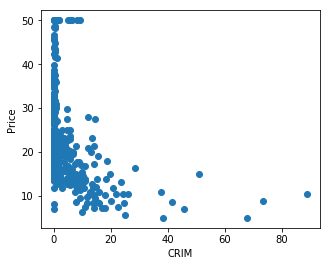

ZN	RMSE = 8.550362491570493


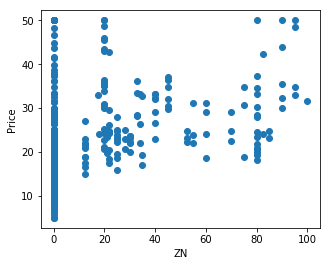

INDUS	RMSE = 8.152894360994136


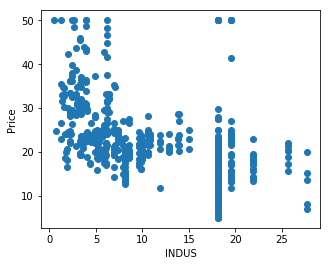

CHAS	RMSE = 9.144073858802283


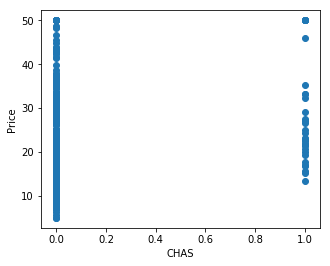

NOX	RMSE = 8.381130948960333


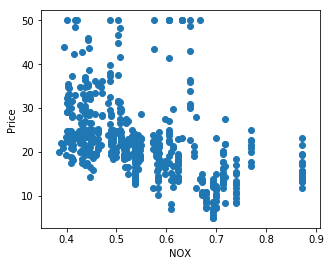

RM	RMSE = 6.972277149440585


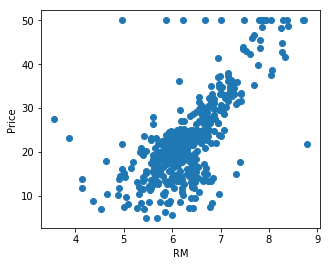

AGE	RMSE = 8.577912204961073


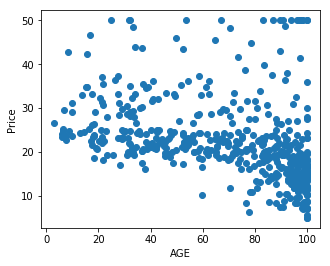

DIS	RMSE = 8.966651746757421


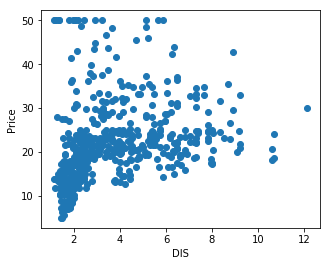

RAD	RMSE = 8.578689610637932


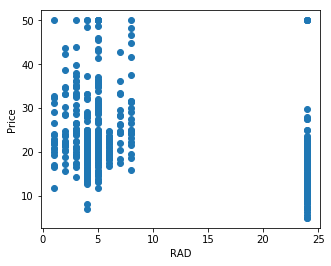

TAX	RMSE = 8.282035144672554


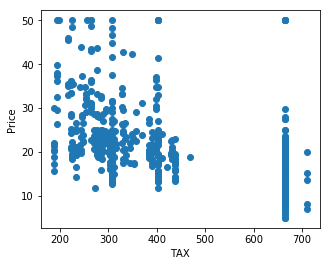

PTRATIO	RMSE = 7.971114169892685


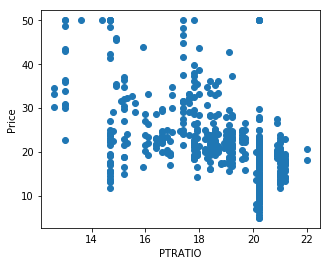

B	RMSE = 8.784863921940127


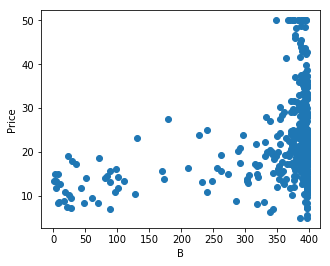

LSTAT	RMSE = 6.201452973865344


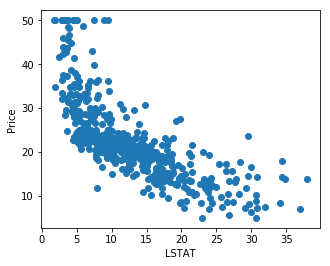

In [5]:
rmses = []
for index, feature_name in enumerate(boston_data.feature_names):
    plt.figure(figsize=(5, 4))
    plt.scatter(boston_data.data[:, index], boston_data.target)
    plt.xlabel(feature_name)
    plt.ylabel('Price')
    X = pd.DataFrame(boston_data.data[:, index])
    Y = boston_data.target
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

    lin_model = LinearRegression()
    lin_model.fit(X_train, Y_train)
    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
#     r2 = r2_score(Y_train, y_train_predict)
    rmses.append((feature_name, rmse))
    print(str(feature_name) + '\tRMSE = ' + str(rmse))
    plt.show()
    



In [16]:
for i in range(0, len(rmses)):  
    for j in range(0, len(rmses)-i-1):  
        if (rmses[j][1] > rmses[j + 1][1]):  
            temp = rmses[j]  
            rmses[j]= rmses[j + 1]  
            rmses[j + 1]= temp
            
print('Rank of the most correlated data with prices (The target is more linearly dependant of the column, if the rmse is lower)')            
for i in rmses:
     print("%2s" % str(rmses.index(i)+1), '{:<10}'.format(i[0]), 'RMSE =', str(i[1]))

Rank of the most correlated data with prices (The target is more linearly dependant of the column, if the rmse is lower)
 1 LSTAT      RMSE = 6.201452973865344
 2 RM         RMSE = 6.972277149440585
 3 PTRATIO    RMSE = 7.971114169892685
 4 INDUS      RMSE = 8.152894360994136
 5 TAX        RMSE = 8.282035144672554
 6 NOX        RMSE = 8.381130948960333
 7 CRIM       RMSE = 8.53838135870556
 8 ZN         RMSE = 8.550362491570493
 9 AGE        RMSE = 8.577912204961073
10 RAD        RMSE = 8.578689610637932
11 B          RMSE = 8.784863921940127
12 DIS        RMSE = 8.966651746757421
13 CHAS       RMSE = 9.144073858802283
